In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import statistics

### Import data

In [157]:
df = pd.read_csv('waterquality.csv')
grouped = df.groupby(['season','flush']).describe()

### Water quality parameters (test strips)

Chlorine

In [4]:
summer_chlor = len(df[(df['season']=='summer') & (df['total_chlorine']==0)])
fall_chlor = len(df[(df['season']=='fall') & (df['total_chlorine']==0)])
winter_chlor = len(df[(df['season']=='winter') & (df['total_chlorine']==0)])

flush_chlor = len(df[(df['flush']=='first_flush') & (df['total_chlorine']==0)])
mains_chlor = len(df[(df['flush']=='mains') & (df['total_chlorine']==0)])

nflush = len(df[(df['flush']=='first_flush')])
nmains = len(df[(df['flush']=='mains')])
nsummer = len(df[(df['season']=='summer')])
nfall = len(df[(df['season']=='fall')])
nwinter = len(df[(df['season']=='winter')])

print('Chlorine was not detected in', round((summer_chlor/nsummer)*100,2), '% of summer samples,', 
      round((fall_chlor/nfall)*100,2),'% of fall samples, and', round((winter_chlor/nwinter)*100,2), '% of winter samples.')
print('Chlorine was not detected in', round((flush_chlor/nflush)*100,2), '% of first-flush samples and',
      round((mains_chlor/nmains)*100,2), '% of mains samples.')

Chlorine was not detected in 52.63 % of summer samples, 60.0 % of fall samples, and 63.89 % of winter samples.
Chlorine was not detected in 84.21 % of first-flush samples and 33.33 % of mains samples.


In [5]:
summer_chlor_flush = len(df[(df['flush']=='first_flush') & (df['total_chlorine']==0) & (df['season']=='summer')])
summer_chlor_mains = len(df[(df['flush']=='mains') & (df['total_chlorine']==0) & (df['season']=='summer')])

fall_chlor_flush = len(df[(df['flush']=='first_flush') & (df['total_chlorine']==0) & (df['season']=='fall')])
fall_chlor_mains = len(df[(df['flush']=='mains') & (df['total_chlorine']==0) & (df['season']=='fall')])

winter_chlor_flush = len(df[(df['flush']=='first_flush') & (df['total_chlorine']==0) & (df['season']=='winter')])
winter_chlor_mains = len(df[(df['flush']=='mains') & (df['total_chlorine']==0) & (df['season']=='winter')])

print("Summer:",summer_chlor_flush,summer_chlor_mains)
print("Fall:",fall_chlor_flush,fall_chlor_mains)
print("Winter:",winter_chlor_flush,winter_chlor_mains)

Summer: 14 6
Fall: 17 7
Winter: 17 6


Temperature

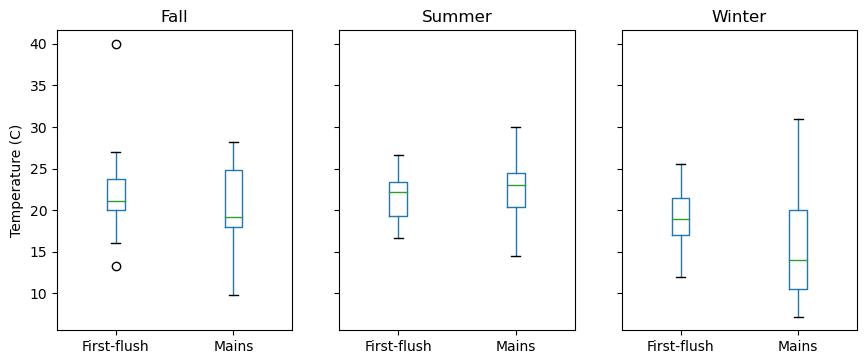

In [6]:
axes = df.groupby('season').boxplot(column=['temp'], by='flush', figsize=(10, 4),
                                         layout=(1, 3), sharey=True, grid=False)
plt.suptitle('')
axes[0].set_xticklabels(['First-flush','Mains'])
axes[0].set_ylabel('Temperature (C)')
axes[0].set_xlabel('')
axes[0].set_title('Fall')

axes[1].set_xlabel('')
axes[1].set_xticklabels(['First-flush','Mains'])
axes[1].set_title('Summer')

axes[2].set_xlabel('')
axes[2].set_xticklabels(['First-flush','Mains'])
axes[2].set_title('Winter')

plt.rcParams.update({'font.size': 10})
plt.savefig("temp.png")
plt.show();

Combine data

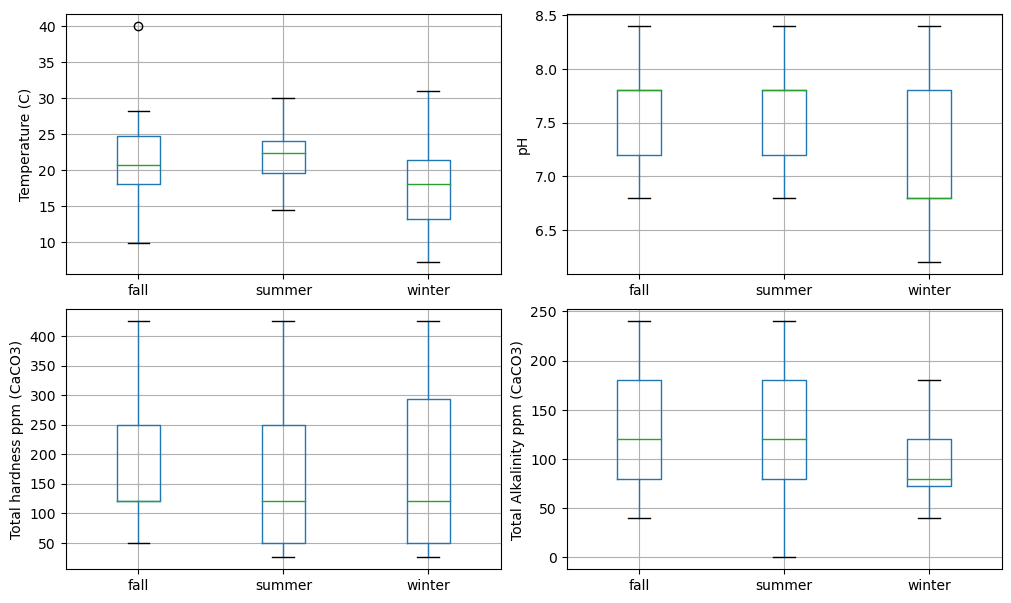

In [7]:
fig, axes = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)

df.boxplot(column='temp', by='season', ax=axes[0,0]) # add boxplot to 1st subplot
axes[0,0].set_ylabel('Temperature (C)')
axes[0,0].set_xlabel('')
axes[0,0].set_title('')

df.boxplot(column='pH', by='season', ax=axes[0,1]) # add boxplot to 2nd subplot
axes[0,1].set_ylabel('pH')
axes[0,1].set_xlabel('')
axes[0,1].set_title('')

df.boxplot(column='hardness', by='season', ax=axes[1,0])
axes[1,0].set_ylabel('Total hardness ppm (CaCO3)')
axes[1,0].set_xlabel('')
axes[1,0].set_title('')

df.boxplot(column='alkalinity', by='season', ax=axes[1,1])
axes[1,1].set_ylabel('Total Alkalinity ppm (CaCO3)')
axes[1,1].set_xlabel('')
axes[1,1].set_title('')

fig.suptitle('')
plt.rcParams.update({'font.size': 10})
plt.show()

In [119]:
# this is generally unhelpful but keeping just in case

# fig, axes = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)

# df.boxplot(column='temp', by=['season','flush'], ax=axes[0,0]) # add boxplot to 1st subplot
# axes[0,0].set_ylabel('Temperature (C)')
# axes[0,0].set_xlabel('')
# axes[0,0].set_title('')

# df.boxplot(column='pH', by=['season','flush'], ax=axes[0,1]) # add boxplot to 2nd subplot
# axes[0,1].set_ylabel('pH')
# axes[0,1].set_xlabel('')
# axes[0,1].set_title('')

# df.boxplot(column='hardness', by=['season','flush'], ax=axes[1,0])
# axes[1,0].set_ylabel('Total hardness ppm (CaCO3)')
# axes[1,0].set_xlabel('')
# axes[1,0].set_title('')

# df.boxplot(column='alkalinity', by=['season','flush'], ax=axes[1,1])
# axes[1,1].set_ylabel('Total Alkalinity ppm (CaCO3)')
# axes[1,1].set_xlabel('')
# axes[1,1].set_title('')

# fig.suptitle('')
# plt.rcParams.update({'font.size': 6})
# plt.show()

### Comprehensive study locations

In [167]:
locations = pd.read_csv('sampling_locations.csv')

In [168]:
lon = locations['Long'].values
lat = locations['Lat'].values
colors = locations['color'].values
source = locations['source'].values
chlorine = locations['chlorine'].values
shape = locations['shape'].values

In [170]:
gdf = geopandas.read_file('./cb_2018_us_state_5m')

In [171]:
# only want to look at continental US
gdf.drop(gdf[gdf['NAME'] == 'Hawaii'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'United States Virgin Islands'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Commonwealth of the Northern Mariana Islands'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Guam'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'American Samoa'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Puerto Rico'].index, inplace = True)
gdf.drop(gdf[gdf['NAME'] == 'Alaska'].index, inplace = True)

In [172]:
# Plot locations categorized by source water and secondary disinfectant
fig,ax = plt.subplots(figsize = (15,15))
gdf.boundary.plot(ax = ax, color='black')

for i in range(0,19):
    plt.plot(lon[i],lat[i],shape[i],color=colors[i],markersize=10)
    
plt.plot(lon[0],lat[0],'o',color='blue',label='Surface, Combined')
plt.plot(lon[4],lat[4],'s',color='blue',label='Surface, Free')
plt.plot(lon[13],lat[13],'o',color='red',label='Ground, Combined')
plt.plot(lon[12],lat[12],'s',color='red',label='Ground, Free')
plt.plot(lon[3],lat[3],'o',color='orange',label='Blend, Combined')

plt.title('Sampling Locations')
plt.legend(loc='lower right');
plt.rcParams.update({'font.size': 14})
plt.savefig('map.png');

In [17]:
plt.rcParams.update(plt.rcParamsDefault)

### Preliminary study locations

In [134]:
locations_p = pd.read_csv('sampling_locations_prelim.csv')
lon_p = locations_p['Long'].values
lat_p = locations_p['Lat'].values
colors_p = locations_p['color'].values
source_p = locations_p['source'].values
chlorine_p = locations_p['chlorine'].values

In [117]:
# Plot locations categorized by source water and secondary disinfectant

# fig,ax = plt.subplots(figsize = (15,15))
# gdf.boundary.plot(ax = ax, color='black')

# for i in range(0,12):
#     plt.plot(lon_p[i],lat_p[i],'o',color=colors_p[i],markersize=9)
    
# plt.plot(lon_p[0],lat_p[0],'o',color='blue',label='Combined, Surface')
# plt.plot(lon_p[9],lat_p[9],'o',color='orange',label='Combined, Ground')
# plt.plot(lon_p[11],lat_p[11],'o',color='gray',label='Combined, Blend')

# plt.plot(lon_p[4],lat_p[4],'o',color='green',label='Free, Surface')
# plt.plot(lon_p[6],lat_p[6],'o',color='red',label='Free, Ground')

# plt.title('Sampling Locations')
# plt.legend(loc='lower right');
# plt.rcParams.update({'font.size': 14})
# plt.savefig('map_prelim.png');

## dPCR results

In [78]:
df2 = pd.read_csv('dPCR.csv')
df2.head()

,season,sample_num,Sample ID,flush,cellular,city,state,chlorine_type,source_water,conc_conv
0,summer,1,1-1M3,mains,intra,Austin,TX,combined,surface,1937.8000
1,summer,1,1-1M0.4,mains,extra,Austin,TX,combined,surface,157013.3333
2,summer,1,1-1F3,first_flush,intra,Austin,TX,combined,surface,8236.0000
3,summer,1,1-1F0.4,first_flush,extra,Austin,TX,combined,surface,95240.0000
4,summer,2,1-2M3,mains,intra,Clifton,VA,combined,surface,0.0000


In [113]:
# get some simple statistics for Legionella occurence grouped by attributes

all_grouped = df2.groupby(['flush','cellular','chlorine_type','source_water']).describe()['conc_conv']
source_grouped = df2.groupby(['source_water']).describe()['conc_conv']
chlor_grouped = df2.groupby(['chlorine_type']).describe()['conc_conv']
cell_grouped = df2.groupby(['cellular']).describe()['conc_conv']
flush_grouped = df2.groupby(['flush']).describe()['conc_conv']